## Sentiment Analysis of News Headlines (Sacarsm or Acclaim)
###### 02/2020    |     Centong Tao & Mingjun Li & Xiaohang Lin

### Purpose of the project
There are tons of text data coming every day, and those data are unstructured. Our group members would like to analyze those data to get some useful information. Our main goal is to predict whether the news is sarcastic based on the headline words, which belongs to sentiment analysis. Deep learning is extensively used in sentiment analysis because this kind of data doesn’t neatly align into columns and cannot be learned by traditional machine learning models. Therefore, we used the RNN model to predict sarcasm and tune the model to get the highest accuracy on testing data.

### Why we chose the topic
Sarcasm is the use of irony to mock or convey contempt, and people use it quite often to express their emotions. However, sarcasm is not necessarily ironic. Since sarcasm is largely context-dependent, our goal here is to do the new categorization by applying neural networks to recognize the sarcasm. Hopefully, we can help the readers to be able to distinguish between fake news and legitimate news. Moreover, we would like to help developing future implementation in news sentiment categorization by detecting more kinds of sentiment such as happy, angry, sad, etc. Peace and Love.

### Data Set:
#### Data from Kaggle: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
The sarcastic and non-sarcastic news headlines are collected from two news websites: The Onionand HuffPost, respectively. These news headlines are written by professionals formally without spelling mistakes and informal usage, thus increases our chance of finding pre-trained embeddings. 
#### Each record in the dataset consists of three attributes:

●is_sarcastic: 1 if the record is sarcastic otherwise 0

●headline: the headline of the news article

●article_link: link to the original news article

### Before we get started, let's import the packages, and take a look at the dataset
We decided to drop the source variable afterwards

In [1]:
import pandas as pd
import numpy as np
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df = df.drop(['article_link'], axis=1)
df['headline'].head()

0    former versace store clerk sues over secret 'b...
1    the 'roseanne' revival catches up to our thorn...
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
Name: headline, dtype: object

#### Look at the headlines that are acclaimed

In [2]:
df[df['is_sarcastic']==0]

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
4,j.k. rowling wishes snape happy birthday in th...,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0



Overview of the output, we want to see if balancing is needed for the data. Our data is pretty balanced, with 43% sarcastic data and 57% non-sarcastic data. Therefore, balancing is not needed for our data. 

In [3]:
np.mean(df['is_sarcastic']==1)

0.43895316185555433

## Data Cleaning

Data cleaning is a tricky part. The popular method used on text cleaning is remove 'unrevelant components' which includes all the stop words, punctuations and numbers. In addition, in order to "restore" or "normalize" all the words, it is also popular to use stemming and lemmatisation. The main goal of above methods is to extract important infomation and improve running efficiency. Besides, when dealing with text with many words (e.p. product review/ aritical paragraphs), these words will convert into high dimensional sequence (for kera to process) which can cause crash.

However, there are several reasons that the cleanning may decrease model accuracy.

First, we cannot simply remove a word due to its high frequency, especially when it comes to judge the emotion of sentence (sarcastic or not is a kind of emotions). Stop words used in some python packages (e.p. nltk) contains words that define sentence emotions, like isn't, aren't, can't, up, ect.  In this case, we need to find other stop word packages that are more suitable (e.p. nlppreprocess).

Second, punctuation like question mark and exclamation mark have strong emotions. Therefore,  they should either be kept or converted to some feature inputs (e.p. number of these marks).

Third, numbers can also be meaningful, for example, some events are recorded as number, and number contains ordinal relationship.

In conclude, in different cases, we need to use different method on text cleaning. Because news headlines  are concise and brief which are acceptable for Keras, and LSTM that we used will capture the semantics of the word, we may not need to cleaning the text. We will do some comparision to verify the guess.

In [4]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [5]:
# remove stop words
#nltk.download('wordnet')
import re, string
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
#change to lower case
df['headline0']=df['headline'].apply((lambda x: x.lower()))
df['len']=df['headline0'].apply(len)
#remove punctuations and numbers
df['remove']=df['headline'].apply((lambda x: ''.join(ch for ch in x if ch not in string.punctuation)))
df['remove']=df['remove'].apply((lambda x: re.sub('[0-9]','',x)))
# df['remove']=df['remove'].apply((lambda x: re.sub('r[\s]','',x)))
df['remove_len']=df['remove'].apply(len)
#remove stop words form nltk
def toke(x):
    wt=word_tokenize(x)
    temp=[]
    for w in wt:
        if w not in stop_words:
            temp.append(w)
    t=' '.join(ch for ch in temp)
    return t
df['nltk']=df['remove'].apply((lambda x: toke(x)))
df['nltk_len']=df['nltk'].apply(len)
#remove stop words from nlp
from  nlppreprocess import NLP
nlp = NLP()
df['nlp'] = df['headline'].apply(nlp.process)
df['nlp_len']=df['nlp'].apply(len)
#normalize
lem = lambda sen : ' '.join(lemmatizer.lemmatize(w) for w in sen)
df['normal']=df['nlp'].apply(word_tokenize).apply(lem)

stem = lambda sen : ' '.join(stemmer.stem(w) for w in sen)
df['normal']=df['normal'].apply(word_tokenize).apply(stem)

In [6]:
df.head(3)

,headline,is_sarcastic,headline0,len,remove,remove_len,nltk,nltk_len,nlp,nlp_len,normal
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues over secret 'b...,78,former versace store clerk sues over secret bl...,76,former versace store clerk sues secret black c...,67,former versace store clerk sues over secret b...,74,former versac store clerk sue over secret blac...
1,the 'roseanne' revival catches up to our thorn...,0,the 'roseanne' revival catches up to our thorn...,84,the roseanne revival catches up to our thorny ...,81,roseanne revival catches thorny political mood...,59,roseanne revival catches up our thorny polit...,73,roseann reviv catch up our thorni polit mood b...
2,mom starting to fear son's web series closest ...,1,mom starting to fear son's web series closest ...,79,mom starting to fear sons web series closest t...,78,mom starting fear sons web series closest thin...,58,mom starting fear son s web series closest thi...,64,mom start fear son s web seri closest thing wi...


##### Output below shows the distribution of our outputs. We agree that there was no further need to balance the data. 

In [11]:
sarc = df[df['is_sarcastic']==1]
nsarc = df[df['is_sarcastic']==0]
print(np.mean(sarc['len']),' ',np.mean(nsarc['len']))

62.63860457181849   59.55862529195863


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

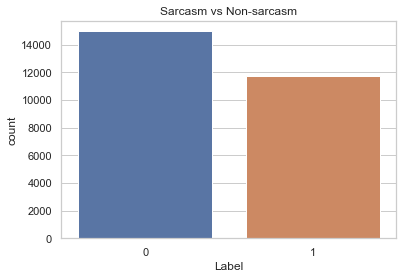

In [12]:
#Count plot, the dataset is roughly balanced
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="is_sarcastic", data=df)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

### Data cleaning does helps to extract words with actual meaning and eliminate unnecessary words for the model to process. 
Here, we calculate the frequencies of the words before and after cleaning. The above output is for the data before cleaning, and the below one is for the data after the process. We can see that the top appearing words have changed from stop words ("to", "of", "'s", "the") to words with actual meanings ("trump", "new", "man").

In [13]:
token_b = nltk.word_tokenize(''.join(df.headline))
frequent_b = nltk.FreqDist(token_b)
frequent_b.most_common(15)

[('to', 8160),
 ('of', 5583),
 ("'s", 4777),
 ('the', 4241),
 ('in', 4079),
 (',', 3589),
 ('for', 3255),
 ("'", 3133),
 ('a', 2789),
 (':', 2551),
 ('on', 2316),
 ('and', 1909),
 ('with', 1771),
 ('is', 1628),
 ('from', 1183)]

In [14]:
token_a = nltk.word_tokenize(''.join(df.nltk))
frequent_a = nltk.FreqDist(token_a)
frequent_a.most_common(15)

[('new', 1013),
 ('trump', 809),
 ('man', 674),
 ('says', 378),
 ('one', 376),
 ('get', 352),
 ('us', 347),
 ('like', 336),
 ('first', 335),
 ('still', 314),
 ('trumps', 301),
 ('make', 296),
 ('donald', 290),
 ('people', 285),
 ('day', 267)]

### The comparison tells us that the number of words decrease significantly after data cleaning, from 255861 to 154128. 

In [15]:
# of words
pd.DataFrame(data=[[sum(frequent_b.values()),sum(frequent_a.values())]],
             columns=['before cleaning','after cleaning'])

,before cleaning,after cleaning
0,255861,159854


#### Sarcastic word cloud image

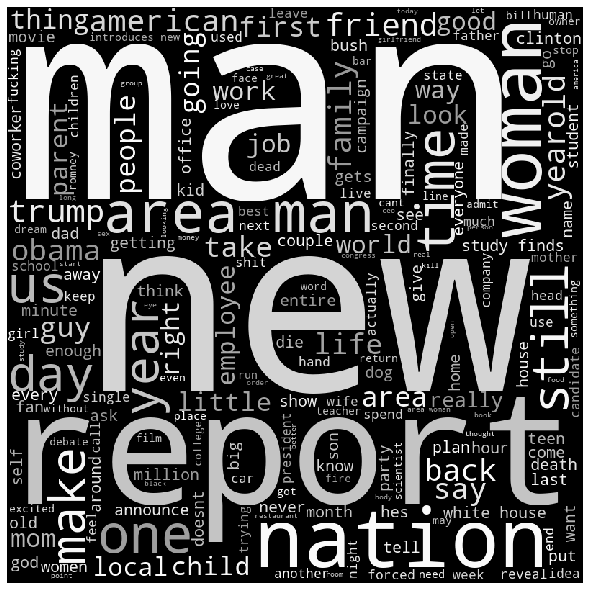

In [16]:
words = " "
for item in sarc.nltk:
    for inner_item in item.lower().split():
        words+=inner_item+" "
        
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 5).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3)) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#### Acclaime word cloud image

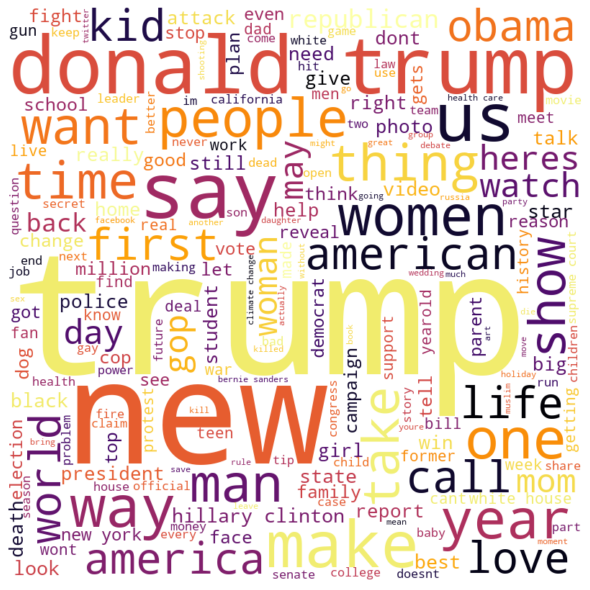

In [17]:
words = " "
for item in nsarc.nltk:
    for inner_item in item.lower().split():
        words+=inner_item+" "
        
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import matplotlib
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,colormap=matplotlib.cm.inferno).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

These two word-cloud images are out of our expectations since there are some (we think) sarcastic words in the acclaimed image, and many neutral words in the sarcastic image.

### Input & Split the data

In [18]:
x=df['headline']
x_remove=df['remove']
x_nltk=df['nltk']
x_nlp=df['nlp']
x_normal=df['normal']
y=df['is_sarcastic']

### Convert into sequence and add padding to ensure the same length 

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 10000
def tex_seq(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # For all the headlines, select the max number of words as the max length of sequence
    max_len = max(x.apply(word_tokenize).apply(len)) 
    tok = Tokenizer(num_words=max_words)
    tok.fit_on_texts(x_train)
    sequences = tok.texts_to_sequences(x_train)
    sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
    return [sequences_matrix,x_test, y_train, y_test,max_len]

Using TensorFlow backend.


### Construct the Model

In [20]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional,GlobalMaxPool1D,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.models import Model
from keras.models import Sequential

In [21]:
def model1():
    model=Sequential()
    #project to low dementional vector and gather similar words
    model.add(Embedding(max_words,32,input_length=max_len)) 
    model.add(LSTM(64,return_sequences = True))
    model.add(GlobalMaxPool1D()) #
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [22]:
def model2():
    model = Sequential()
    model.add(Embedding(max_words,128,input_length=max_len))
    model.add(Bidirectional(LSTM(128, return_sequences = True)))
    model.add(GlobalMaxPool1D())
    model.add(Dense(40, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    return model

In [23]:
def model3():
    model = Sequential()
    model.add(Embedding(max_words,128,input_length=max_len))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(196, dropout=0.5, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    return model

### Comparision
#### The validation accuracy represents how well the model is, and the result verifies our guess that we don't have to clean our data.

In [24]:
from sklearn.model_selection import train_test_split
t=tex_seq(x,y)
max_len=t[-1]
model = model3()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(t[0],t[2],batch_size=100,epochs=5, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           1280000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 197       
Total params: 1,534,997
Trainable params: 1,534,997
Non-trainable params: 0
_________________________________________________________________


C:\Users\limin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 55s 3ms/step - loss: 0.5154 - accuracy: 0.7264 - val_loss: 0.3546 - val_accuracy: 0.8411
Epoch 2/5
17093/17093 [==============================] - 53s 3ms/step - loss: 0.3070 - accuracy: 0.8732 - val_loss: 0.3281 - val_accuracy: 0.8552
Epoch 3/5
17093/17093 [==============================] - 52s 3ms/step - loss: 0.2387 - accuracy: 0.9070 - val_loss: 0.3355 - val_accuracy: 0.8552
Epoch 4/5
17093/17093 [==============================] - 51s 3ms/step - loss: 0.1975 - accuracy: 0.9252 - val_loss: 0.3444 - val_accuracy: 0.8629
Epoch 5/5
17093/17093 [==============================] - 52s 3ms/step - loss: 0.1638 - accuracy: 0.9387 - val_loss: 0.3575 - val_accuracy: 0.8606


In [25]:
t=tex_seq(x_remove,y)
max_len=t[-1]
model = model3()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_remove=model.fit(t[0],t[2],batch_size=100,epochs=5, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 38, 128)           1280000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 38, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 197       
Total params: 1,534,997
Trainable params: 1,534,997
Non-trainable params: 0
_________________________________________________________________


C:\Users\limin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 41s 2ms/step - loss: 0.5204 - accuracy: 0.7280 - val_loss: 0.3736 - val_accuracy: 0.8369
Epoch 2/5
17093/17093 [==============================] - 40s 2ms/step - loss: 0.3144 - accuracy: 0.8689 - val_loss: 0.3449 - val_accuracy: 0.8514
Epoch 3/5
17093/17093 [==============================] - 40s 2ms/step - loss: 0.2391 - accuracy: 0.9077 - val_loss: 0.3482 - val_accuracy: 0.8503
Epoch 4/5
17093/17093 [==============================] - 40s 2ms/step - loss: 0.1956 - accuracy: 0.9256 - val_loss: 0.3569 - val_accuracy: 0.8467
Epoch 5/5
17093/17093 [==============================] - 40s 2ms/step - loss: 0.1632 - accuracy: 0.9404 - val_loss: 0.3964 - val_accuracy: 0.8439


In [26]:
t=tex_seq(x_nltk,y)
max_len=t[-1]
model = model3()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_nltk=model.fit(t[0],t[2],batch_size=100,epochs=5, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 26, 128)           1280000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 26, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 197       
Total params: 1,534,997
Trainable params: 1,534,997
Non-trainable params: 0
_________________________________________________________________


C:\Users\limin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 31s 2ms/step - loss: 0.6089 - accuracy: 0.6527 - val_loss: 0.4686 - val_accuracy: 0.7716
Epoch 2/5
17093/17093 [==============================] - 30s 2ms/step - loss: 0.3952 - accuracy: 0.8214 - val_loss: 0.4405 - val_accuracy: 0.7929
Epoch 3/5
17093/17093 [==============================] - 30s 2ms/step - loss: 0.3060 - accuracy: 0.8690 - val_loss: 0.4494 - val_accuracy: 0.7957
Epoch 4/5
17093/17093 [==============================] - 29s 2ms/step - loss: 0.2499 - accuracy: 0.8960 - val_loss: 0.4657 - val_accuracy: 0.7955
Epoch 5/5
17093/17093 [==============================] - 30s 2ms/step - loss: 0.2075 - accuracy: 0.9163 - val_loss: 0.5347 - val_accuracy: 0.7908


In [27]:
t=tex_seq(x_nlp,y)
max_len=t[-1]
model = model3()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_nlp=model.fit(t[0],t[2],batch_size=100,epochs=5, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 128)           1280000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 32, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 197       
Total params: 1,534,997
Trainable params: 1,534,997
Non-trainable params: 0
_________________________________________________________________


C:\Users\limin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 38s 2ms/step - loss: 0.5758 - accuracy: 0.6789 - val_loss: 0.4273 - val_accuracy: 0.8084
Epoch 2/5
17093/17093 [==============================] - 36s 2ms/step - loss: 0.3604 - accuracy: 0.8438 - val_loss: 0.3866 - val_accuracy: 0.8222
Epoch 3/5
17093/17093 [==============================] - 36s 2ms/step - loss: 0.2820 - accuracy: 0.8846 - val_loss: 0.3924 - val_accuracy: 0.8215
Epoch 4/5
17093/17093 [==============================] - 36s 2ms/step - loss: 0.2289 - accuracy: 0.9071 - val_loss: 0.4082 - val_accuracy: 0.8222
Epoch 5/5
17093/17093 [==============================] - 74867s 4s/step - loss: 0.1903 - accuracy: 0.9255 - val_loss: 0.4672 - val_accuracy: 0.8238


In [28]:
t=tex_seq(x_normal,y)
max_len=t[-1]
model = model3()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_normal=model.fit(t[0],t[2],batch_size=100,epochs=5, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 32, 128)           1280000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 32, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 197       
Total params: 1,534,997
Trainable params: 1,534,997
Non-trainable params: 0
_________________________________________________________________


C:\Users\limin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 29s 2ms/step - loss: 0.5790 - accuracy: 0.6759 - val_loss: 0.4611 - val_accuracy: 0.7864
Epoch 2/5
17093/17093 [==============================] - 29s 2ms/step - loss: 0.3766 - accuracy: 0.8368 - val_loss: 0.4123 - val_accuracy: 0.8140
Epoch 3/5
17093/17093 [==============================] - 26s 2ms/step - loss: 0.3011 - accuracy: 0.8756 - val_loss: 0.4033 - val_accuracy: 0.8187
Epoch 4/5
17093/17093 [==============================] - 24s 1ms/step - loss: 0.2526 - accuracy: 0.8968 - val_loss: 0.4247 - val_accuracy: 0.8180
Epoch 5/5
17093/17093 [==============================] - 21s 1ms/step - loss: 0.2104 - accuracy: 0.9178 - val_loss: 0.4590 - val_accuracy: 0.8168


### The RNN structure:
##### Input --> Embedding --> LSTM --> Global Max Pool 1D--> Dropout --> Dense --> Output
The embedding layer is the first hidden layer of the network, and it is used for text data. Embedding requires data processing before running the model so that a unique integer represents each word, and the headlines will be in the form of a matrix. We specify three arguments: inputs dimension, outputs dimension, and input length. And for the three models we had, the dimension of the input is set to be 10,000, and the input length is the same with the maximum number of words for all the headlines. For the second and third models, the output dimension is 128, compared to 32 for the first model. The accuracy rate is higher when we set a larger output dimension.

LTSM: long short term memory, which uses gates to control the memorizing process. We were using it since LTSM can forget about the unnecessary information. Our best model, which is model 3 has a dropout parameter to avoid overfitting. We have tried different dropout percentages, and it turns out that 0.5 gives us the highest accuracy rate.

Global Max Pool 1D: takes the max vector over the steps dimension, which means this layer will choose the maximum vector of each headline. This layer is applied in our first and second models, and we find it not that helpful. Thus we abandon that in our last model.

Dropout: dropout layer means every time the model updates, certain data needs to removed temporarily along with all its connections to avoid overfitting. Since we are using the LTSM, which is usually overfitted. Therefore, it is very important to do Drop out. We apply a layer called spatialdropout, which is stronger since it drops entire 1D feature maps instead of individual elements. We agreed that with SpatialDropout1D, the accuracy rate has improved. The reason for that is there are correlations with adjacent elements in each headline, so the regular dropout does not regularize the activations but result in an effective learning rate decrease.

Dense: For all models, we choose the input tensor to be 1 and activation to be sigmoid. Sigmoid helps the model to learn the non-linear relationships between input and output, which is necessary for our project.

After building the model, we fit our train dataset(it's a matrix after we convert it). We choose epoch equals to 5 because during the model fitting process, it stopped at epoch equals to 3 when we set early stop. 

### Model Testing

#### Converts the test dataset to be matrix and test with the test dataset. Finally calculate the accruacy rate and loss.

In [29]:
x=df['headline']
y=df['is_sarcastic']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
max_words = 10000
# For all the headlines, select the max number of words as the max length of sequence
max_len = max(x.apply(word_tokenize).apply(len)) 
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [30]:
from keras.callbacks import EarlyStopping
model = model3()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(sequences_matrix,y_train,batch_size=100,epochs=5, validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
accr = model.evaluate(test_sequences_matrix,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

C:\Users\limin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 35s 2ms/step - loss: 0.5164 - accuracy: 0.7288 - val_loss: 0.3589 - val_accuracy: 0.8425
Epoch 2/5
17093/17093 [==============================] - 33s 2ms/step - loss: 0.3120 - accuracy: 0.8699 - val_loss: 0.3277 - val_accuracy: 0.8568
Epoch 3/5
17093/17093 [==============================] - 31s 2ms/step - loss: 0.2376 - accuracy: 0.9066 - val_loss: 0.3258 - val_accuracy: 0.8606
Epoch 4/5
5342/5342 [==============================] - 4s 687us/step
Test set
  Loss: 0.377
  Accuracy: 0.846


In [31]:
pd.DataFrame(history.history)

,val_loss,val_accuracy,loss,accuracy
0,0.358912,0.842536,0.516423,0.728778
1,0.327677,0.856809,0.312008,0.869888
2,0.325842,0.860552,0.237608,0.906628
3,0.356876,0.856341,0.189466,0.926286


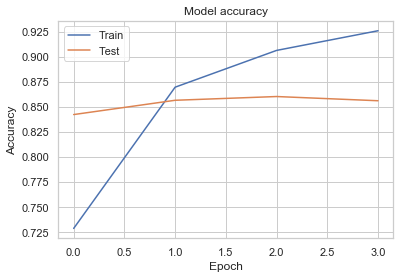

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

From the plot, we can see that the performance of training dataset is better than the test dataset after epoch =1. This is due to after more training process, our model has built a better relationships between input and output. 
We are satisfied with the accruacy rate.

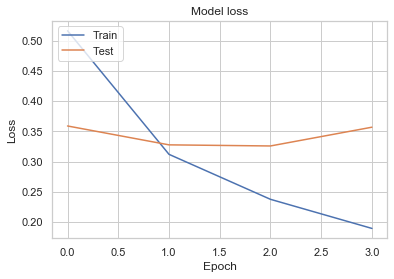

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

From this plot, we can see that the performance of the training data is getting better than the validation test dataset when we reach epoch =1. Though the gap between two dataset is expanding, we believe that this can be solved when we feed the model with more observations.

### Model prediction
We used our best model to predict the test dataset. And finally, built one list of what machine predicted wrong.

In [34]:
ynew1=model.predict_classes(test_sequences_matrix)

In [35]:
ynew11=[]
for y in ynew1:
    ynew11.append(y)

In [36]:
ynew=model.predict(test_sequences_matrix)
#pd.Series(ynew)

In [37]:
ynew0=[]
for y in ynew:
    ynew0.append(y)

In [38]:
ynew0=pd.Series(ynew0)
ynew11=pd.Series(ynew11)

In [39]:
y_test

17437    0
37       0
17007    1
4712     1
23739    0
        ..
13958    0
14286    0
337      0
8339     0
22239    1
Name: is_sarcastic, Length: 5342, dtype: int64

In [40]:
final=pd.concat([x_test,pd.Series(y_test),ynew11],axis=1)

In [41]:
final

,headline,is_sarcastic,0
0,NaN,NaN,[0]
1,NaN,NaN,[0]
2,NaN,NaN,[1]
3,NaN,NaN,[0]
4,j.k. rowling wishes snape happy birthday in th...,0.0,[0]
...,...,...,...
26698,hackers breached u.s. election agency after vo...,0.0,NaN
26699,"what you should buy your 'basic' friend, accor...",0.0,NaN
26700,what's in your mailbox? tips on what to do whe...,0.0,NaN
26706,reparations and obama,0.0,NaN


In [42]:
final=final.dropna()
final=pd.DataFrame({'headline':final['headline'],'truth':final['is_sarcastic'],'pred':final[0]})
print(final)

                                               headline  truth pred
4     j.k. rowling wishes snape happy birthday in th...    0.0  [0]
5                           advancing the world's women    0.0  [0]
6        the fascinating case for eating lab-grown meat    0.0  [0]
9     friday's morning email: inside trump's presser...    0.0  [0]
10    airline passengers tackle man who rushes cockp...    0.0  [1]
...                                                 ...    ...  ...
5314  reverend al sharpton takes time off from holy ...    1.0  [1]
5315  ravens take out rival steelers in playoff grud...    0.0  [1]
5316       why we should value (but not worship) reason    0.0  [0]
5322                                i was, but now i am    0.0  [1]
5323  women in business q&a: paula kavolius, founder...    0.0  [0]

[1085 rows x 3 columns]


In [43]:
final[final['truth']!=final['pred']]

,headline,truth,pred
10,airline passengers tackle man who rushes cockp...,0.0,[1]
16,cosby lawyer asks why accusers didn't come for...,1.0,[0]
17,"stock analysts confused, frightened by boar ma...",1.0,[0]
18,bloomberg's program to build better cities jus...,0.0,[1]
28,"after careful consideration, bush recommends o...",1.0,[0]
...,...,...,...
5248,americans outraged amazon's punishing work cul...,1.0,[0]
5282,dance cage recidivism rates at all-time high w...,1.0,[0]
5300,overburdened mental health providers thwart po...,0.0,[1]
5315,ravens take out rival steelers in playoff grud...,0.0,[1]


# Conclusions:
The quality of data cleaning plays a vital role in determining the accuracy of the prediction. Our initial thought is that we want to eliminate all the irrelevant information, including stop words, empty spaces, punctuations, and numbers, leaving only the critical information with actual meanings. After data cleaning, the word count decreased significantly from 255,861 to 161,223. The best model accuracy rate of testing data is 80%, given that we have limited training data, we are satisfied with the results. 

We also perform the model fitting and prediction on the uncleaned data, to compare with the abovementioned result. The result is to our surprise. The accuracy is 86%, 6% higher than the result from prediction using cleaned data (=80%). We thus look back to the list of stopwords provided by the NLTK package, and find that some words in the list (like "don't", "can't", hasn't") could determine the meaning of a sentence. Especially when using a model like LSTM, where the model ONLY captures the semantic meanings of a word that are depended upon the information provided by previous texts, removing these critial stop words negates the original context and meaning of the sentenses. As a result, if we restore these removed stop words to the data, although the noise level increases, the accuracy rate is also significantly improved due to more information in the sentence providing ground for more precise judgement for the algorithm. Therefore, one possible way to improve our model is to put more consideration into determining the selection of words to remove. 

Sarcasm is largely context-based. Therefore, the machine can make reasonable mistakes while the algorithm is looking for statistical relationships between input and output. In the list of what the machine predicted wrong, there is one sarcastic headline, "Obama return pari climat talk coupl energyeffici light bulb", that is predicted as acclaim. We guess the reason behind the wrong judgment is that 'Obama' appeared many times in the acclaimed headlines, so the machine follows this pattern and predicts so. There is a learning process for the algorithm, the more we train, the better judgment the machine will make. So we believe that if we could increase the amount of training data, the testing accuracy of the model will improve. 

# Sentiment Analysis Application for News Article Categorization in Journalism
### Hopefully, Machine Sentiment Detection can be implemented to categorize news sentiment in Journalism

By applying the technique in real-world, we hope to help users to automatically detect and labeling all kinds of sentiments (such as happy, angry, sad, etc.) for online news articles. Furthermore, it helps users to identify the viewpoint of the headline and polarity of the content with less cost, which can make them do the opinion mining easily and quickly.

### Business applications: Not only for journalism

The business application of machine sentiment analysis of newspaper headlines can be used not only for journalism but also for a wide range of businesses that need to process and analyze a massive amount of text data. Our project can be used to exploit the unstructured data for actionable insights to improve brand and product reputations with less cost, higher efficiency, and better accuracy. 

